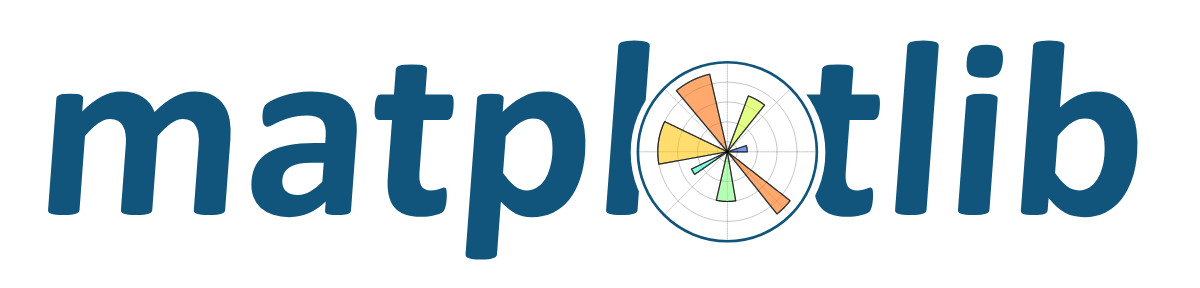

## 📊 Biblioteca Matplotlib

📌 [Documentação](https://matplotlib.org/stable/index.html)

>### Importação

- **import matplotlib.pyplot as plt**

>### Funções Importantes (Pyplot)

- **plt.plot(x,y)** -> Plota um gráfico do eixo x e y (possui diversos parâmetros)

- **plt.show()** -> Mostra o gráfico

- **plt.grid(linestyle=)** -> Plota um grid no gráfico

- **plt.legend()** -> Fazer uma legenda para o plot (precisam ter label no plt.plot())

>### Funções Importantes (Figuras)

- **fig, ax = plt.subplots()** -> Inicia a figura

- **ax.plot(x,y)** -> Plota um gráfico do eixo x e y (figura)

- **set_xlim() e set_ylim()** -> Delimitar as escalas (limites) do eixo X e Y

- **fig.subplots_adjust(hspace=, wspace=)** -> Ajustar o espaçamento entre as figuras

- **ax.xaxis.set_major_locator(plt.MultipleLocator(5))** -> Fazer com que o eixo X ou Y (yaxis) tenham valores de 5 em 5

- **ax.xaxis.set_tick_params(labelsize=12)** -> Modificar os ticks (tamanho da label)

- **ax.set_title('Título', fontsize=)** -> Setar um título 

- **ax.set_xlabel('Label', fontsize=)** -> Setar X Label

- **ax.set_ylabel('Label', fontsize=)** -> Setar Y Label

- **ax.set_frame_on(False)** -> Retirar o retângulo que fica em volta do gráfico

- **ax.get_xaxis().set_visible(False)** -> Retirar os valores do eixo X ou Y (yaxis)

- **ax.tick_params(axis='both', which='both', length=0)** -> Retirar os ticks

- **ax.spines['top'].set_visible(False)** -> Remover linhas específicas do retângulo (top, right, left, bottom)

- **fig.savefig('Título.png', transparent=True, dpi=300, bbox_inches='tight')** -> Salvar a figura sem fundo

>### Customização

- **plt.title('Título')** -> Criar um título para o gráfico

- **plt.xlabel('Nome do Eixo X')** -> Nome para o Eixo X

- **plt.ylabel('Nome do Eixo Y')** -> Nome para o Eixo Y

- **print(plt.style.available)** -> Printa os estilos disponíveis

- **plt.style.use('fivethirtyeight')** -> Customiza o gráfico com o estilo escolhido

- **with plt.style.context('fivethirtyeight'):** -> Aplicar um estilo apenas a um bloco de código específico

- **IPython_default = plt.rcParams.copy()** -> Evitar que o estilo seja aplicado a todos os gráficos plotados no mesmo notebook

>### Bar Plots

- **Gráfico bom para representar Series de dados numéricos com categóricos (Comparação)**

- **plt.bar(x,y, label=, color=)** -> Plota um gráfico de barras vertical

- **plt.barh(x,y, label=, color=)** -> PLota um gráfico de barras horizontal

>### Histograms

- **Gráfico bom para representar Arrays de dados numéricos com categóricos (Distribuição)**

- **plt.hist(x,y, histtype='bar', rwidth=0.8)** -> Plota um histograma

>### Scatter Plots

- **Gráfico bom para representar Series de dados numéricos com categóricos (Correlação por Dispersão)**

- **plt.scatter(x,y, label=, color=, marker=, s=)** -> Plota um scatter plot



<img src="https://matplotlib.org/stable/_images/anatomy.png" width="800" height="800">

In [2]:
import matplotlib.pyplot as plt

In [12]:
# Extensões de Arquivos que dá pra salvar os gráficos
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format'}


In [3]:
# Estilos de Gráficos disponíveis
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


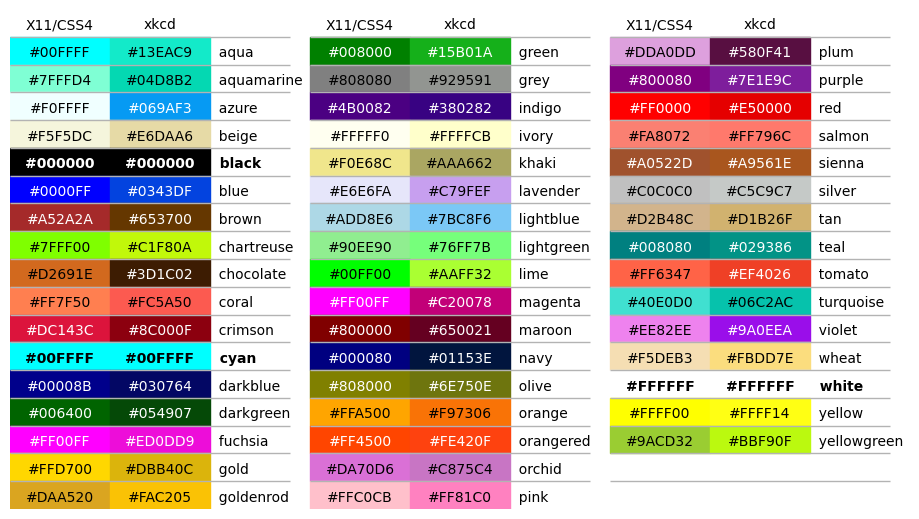

In [11]:
# RGB xkcd e X11/CSS4 Colors
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch

overlap = {name for name in mcolors.CSS4_COLORS
           if f'xkcd:{name}' in mcolors.XKCD_COLORS}

fig = plt.figure(figsize=[9, 5])
ax = fig.add_axes([0, 0, 1, 1])

n_groups = 3
n_rows = len(overlap) // n_groups + 1

for j, color_name in enumerate(sorted(overlap)):
    css4 = mcolors.CSS4_COLORS[color_name]
    xkcd = mcolors.XKCD_COLORS[f'xkcd:{color_name}'].upper()

    # Pick text colour based on perceived luminance.
    rgba = mcolors.to_rgba_array([css4, xkcd])
    luma = 0.299 * rgba[:, 0] + 0.587 * rgba[:, 1] + 0.114 * rgba[:, 2]
    css4_text_color = 'k' if luma[0] > 0.5 else 'w'
    xkcd_text_color = 'k' if luma[1] > 0.5 else 'w'

    col_shift = (j // n_rows) * 3
    y_pos = j % n_rows
    text_args = dict(fontsize=10, weight='bold' if css4 == xkcd else None)
    ax.add_patch(mpatch.Rectangle((0 + col_shift, y_pos), 1, 1, color=css4))
    ax.add_patch(mpatch.Rectangle((1 + col_shift, y_pos), 1, 1, color=xkcd))
    ax.text(0.5 + col_shift, y_pos + .7, css4,
            color=css4_text_color, ha='center', **text_args)
    ax.text(1.5 + col_shift, y_pos + .7, xkcd,
            color=xkcd_text_color, ha='center', **text_args)
    ax.text(2 + col_shift, y_pos + .7, f'  {color_name}', **text_args)

for g in range(n_groups):
    ax.hlines(range(n_rows), 3*g, 3*g + 2.8, color='0.7', linewidth=1)
    ax.text(0.5 + 3*g, -0.3, 'X11/CSS4', ha='center')
    ax.text(1.5 + 3*g, -0.3, 'xkcd', ha='center')

ax.set_xlim(0, 3 * n_groups)
ax.set_ylim(n_rows, -1)
ax.axis('off')

plt.show()

In [6]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

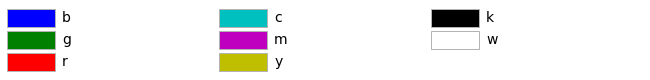

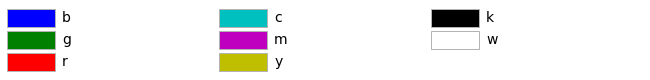

In [7]:
# Base Colors
plot_colortable(mcolors.BASE_COLORS, ncols=3, sort_colors=False)

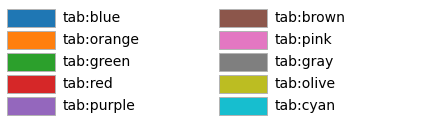

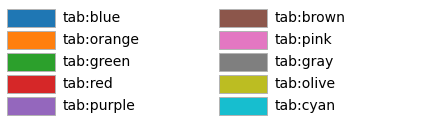

In [8]:
# Tableau Palette
plot_colortable(mcolors.TABLEAU_COLORS, ncols=2, sort_colors=False)

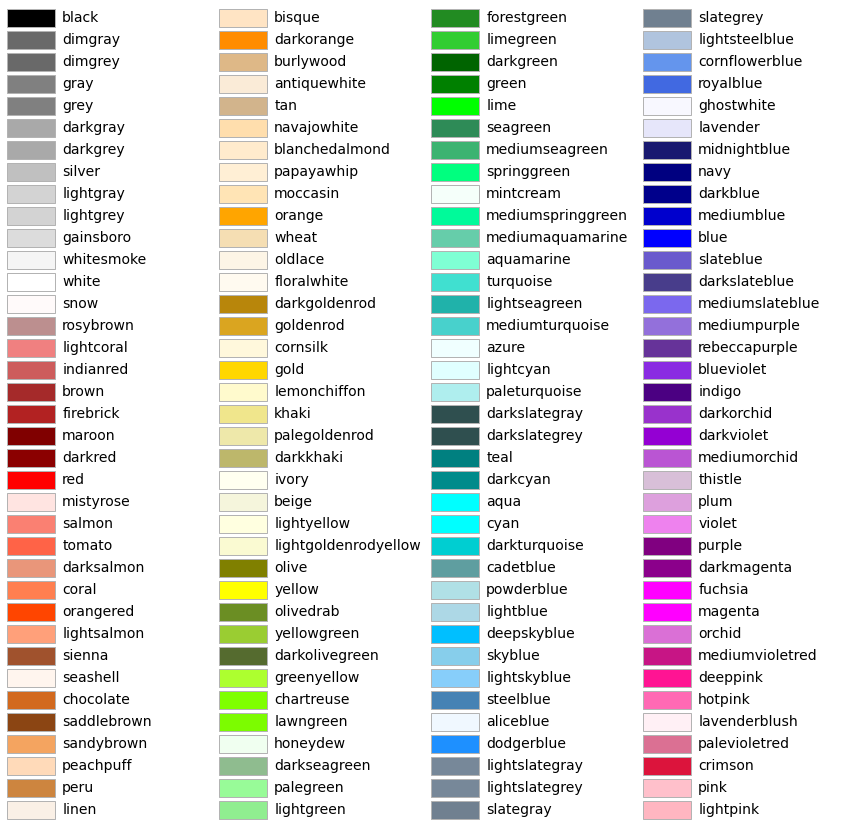

In [9]:
# CSS Colors
plot_colortable(mcolors.CSS4_COLORS)
plt.show()